# A3Q5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fft import fft, ifft, fftfreq
from IPython.display import Audio

# Load the audio file
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

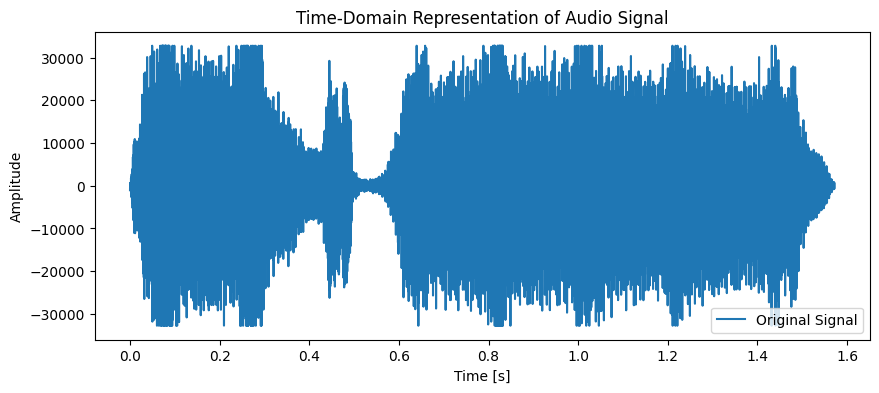

In [2]:
n = len(y)
time = np.arange(n) / Fs

# Plot the original time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(time, y, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time-Domain Representation of Audio Signal')
plt.legend()
plt.show()

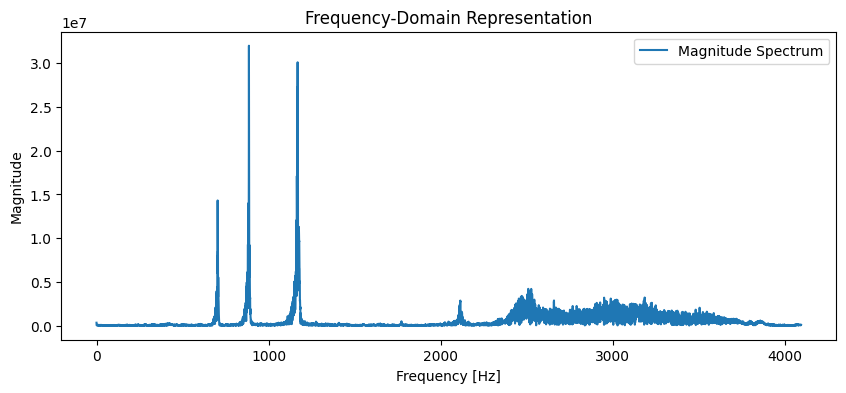

In [3]:
# Compute the Fourier Transform
Y = fft(y)
freqs = fftfreq(n, 1/Fs)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs[:n//2], np.abs(Y[:n//2]), label='Magnitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain Representation')
plt.legend()
plt.show()

In [4]:
# Design the filters
cutoff_freq = 2000
low_pass_filter = (np.abs(freqs) <= cutoff_freq)
high_pass_filter = (np.abs(freqs) >= cutoff_freq)

# Apply the filters
Y_train = Y * low_pass_filter
Y_bird = Y * high_pass_filter

# Convert back to time-domain
train_signal = np.real(ifft(Y_train))
bird_signal = np.real(ifft(Y_bird))

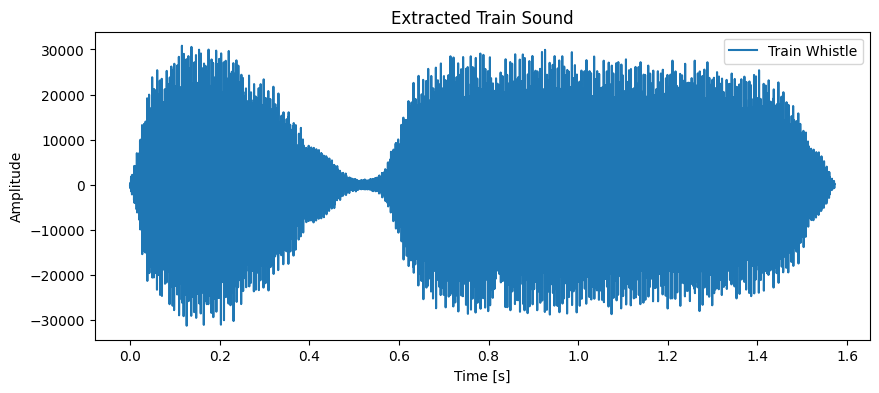

Playing extracted train whistle...


In [5]:
# Plot filtered signals
plt.figure(figsize=(10, 4))
plt.plot(time, train_signal, label='Train Whistle')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Extracted Train Sound')
plt.legend()
plt.show()

# Play the extracted sounds
print("Playing extracted train whistle...")
Audio(train_signal, rate=Fs)

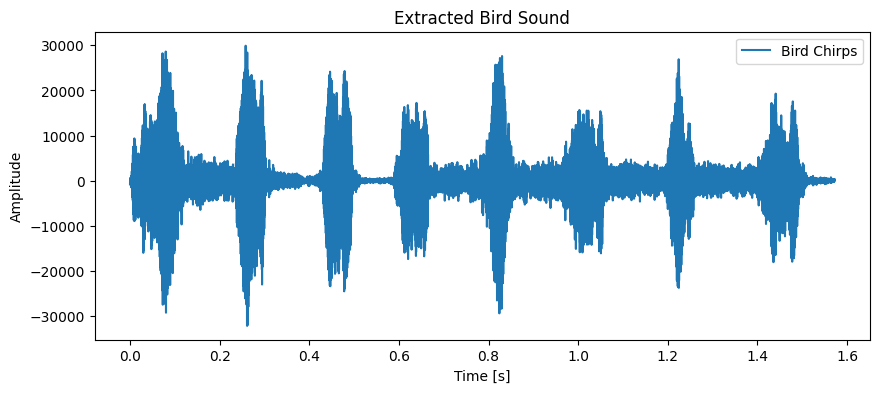

Playing extracted bird chirps...


In [6]:
plt.figure(figsize=(10, 4))
plt.plot(time, bird_signal, label='Bird Chirps')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Extracted Bird Sound')
plt.legend()
plt.show()

# Play the extracted sounds
print("Playing extracted bird chirps...")
Audio(bird_signal, rate=Fs)